In [1]:
!pip3 install opencv-python

In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from  matplotlib import pyplot as plt
from  matplotlib import *
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img


In [86]:
#path = os.listdir(r'D:\AI\S3L2\projects\ML-DM\archive\chest_xray\train')
#classes = {'PNEUMONIA':0, 'NORMAL':1}

In [4]:
image_size= 32

dir_base='D:/AI/S3L2/projects/ML-DM/archive/chest_xray'
test_dir = '{}/{}'.format(dir_base, 'test')
train_dir = '{}/{}'.format(dir_base, 'train')
val_dir = '{}/{}'.format(dir_base, 'val')

test_dir_normal_cases = '{}/{}/{}'.format(dir_base, 'test','NORMAL')
train_dir_normal_cases = '{}/{}/{}'.format(dir_base, 'train','NORMAL')
val_dir_normal_cases = '{}/{}/{}'.format(dir_base, 'val','NORMAL')

test_dir_pneumonia_cases = '{}/{}/{}'.format(dir_base, 'test','PNEUMONIA')
train_dir_pneumonia_cases = '{}/{}/{}'.format(dir_base, 'train','PNEUMONIA')
val_dir_pneumonia_cases = '{}/{}/{}'.format(dir_base, 'val','PNEUMONIA')

In [5]:
def get_data(path,label,data_type,process_flipped):
    result = []
    items = os.listdir(path)
    for i in items:
        img_path = '{}/{}/{}/{}'.format(dir_base,data_type,label,i)
        result.append((get_image_arr(img_path),label))
        if process_flipped == True:
            result.append((get_flipped_image_arr(img_path),label))
    return pd.DataFrame(result, columns=['image', 'label'],index=None)

In [6]:
def get_flipped_image_arr(path):
        original = cv2.imread(path) 
        img = cv2.flip(original, 1)
        img = cv2.resize(img,9 (image_size, image_size),interpolation = cv2.INTER_AREA).reshape(1,-1)
        return img

In [7]:
def get_image_arr(path):
        img = cv2.imread(path) 
        img = cv2.resize(img, (image_size, image_size),interpolation = cv2.INTER_AREA).reshape(1,-1)
        return img

In [8]:
def show_plot(k_values,accuracy_values):
    fig = plt.figure()
    fig.subplots_adjust(top=0.8)
    ax1 = fig.add_subplot()
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('K value')
    plt.plot(k_values,accuracy_values,label='Accuracy for k params')
    plt.scatter(k_values,accuracy_values,c=k_values,alpha=1)
    plt.legend()
    plt.show()

In [9]:
def show_confusion_matrix(model,x,y):
    disp = plot_confusion_matrix(model, x, y,
                             cmap=plt.cm.Blues,
                             normalize=None)
    plt.show()

In [1]:
data_normal = get_data(train_dir_normal_cases,'NORMAL','train',True)
data_pneumonia = get_data(train_dir_pneumonia_cases,'PNEUMONIA','train',False)

NameError: name 'get_data' is not defined

In [11]:
data = pd.concat([data_normal,data_pneumonia])
images = data.image
y = data.label

X = []
for i in images.values:
    X.append(i[0])
X = np.array(X)

In [12]:
print('X shape:',X.shape)
print('Y shape:',y.shape)


X shape: (6557, 3072)
Y shape: (6557,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=30)


In [14]:
print('X train shape:',X_train.shape)
print('Y train shape:',y_train.shape)

print('X train shape:',X_test.shape)
print('Y train shape:',y_test.shape)

X train shape: (1967, 3072)
Y train shape: (1967,)
X train shape: (4590, 3072)
Y train shape: (4590,)


In [15]:
print('Classes: ',np.unique(y_train))


Classes:  ['NORMAL' 'PNEUMONIA']


Accuracy for k=1: 0.9202614379084967


              precision    recall  f1-score   support

      NORMAL       0.92      0.88      0.90      1857
   PNEUMONIA       0.92      0.95      0.93      2733

    accuracy                           0.92      4590
   macro avg       0.92      0.91      0.92      4590
weighted avg       0.92      0.92      0.92      4590

_________________________________________


Accuracy for k=3: 0.9335511982570807


              precision    recall  f1-score   support

      NORMAL       0.94      0.89      0.92      1857
   PNEUMONIA       0.93      0.96      0.95      2733

    accuracy                           0.93      4590
   macro avg       0.94      0.93      0.93      4590
weighted avg       0.93      0.93      0.93      4590

_________________________________________


Accuracy for k=5: 0.9342047930283225


              precision    recall  f1-score   support

      NORMAL       0.95      0.89      0.92      1857
   PNEUMONIA       0.93      0.9

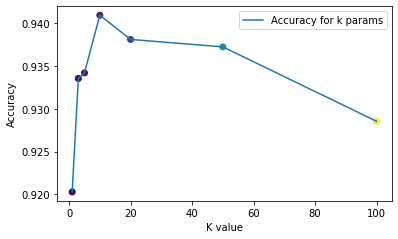

In [16]:
k_values = [1, 3, 5, 10, 20, 50, 100]
accuracy_values = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, predictions)
    accuracy_values.append(acc)
    print('Accuracy for k={}:'.format(str(k)),acc)
    print('\n')
    print(classification_report(y_test, predictions))
    print('_________________________________________')
    print('\n')
show_plot(k_values,accuracy_values)

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

In [18]:
#Load test data
test_data_normal = get_data(test_dir_normal_cases,'NORMAL','test',False)
test_data_pneumonia = get_data(test_dir_pneumonia_cases,'PNEUMONIA','test',False)

test_data_total = pd.concat([test_data_normal,test_data_pneumonia])

y_test_data = test_data_total.label

X_test_data = []
for i in test_data_total.image.values:
    X_test_data.append(i[0])
    
X_test_data = np.array(X_test_data)

Accuracy for test 0.7980769230769231
              precision    recall  f1-score   support

      NORMAL       0.94      0.49      0.65       234
   PNEUMONIA       0.76      0.98      0.86       390

    accuracy                           0.80       624
   macro avg       0.85      0.74      0.75       624
weighted avg       0.83      0.80      0.78       624



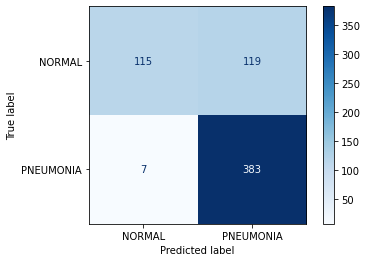

In [19]:
predictions_test = knn_model.predict(X_test_data)
acc_test = metrics.accuracy_score(y_test_data, predictions_test)
print('Accuracy for test',acc_test)
print(classification_report(y_test_data, predictions_test))
show_confusion_matrix(knn_model,X_test_data,y_test_data)

In [20]:
data = data.dropna()
data.isnull().sum().sum()

0

In [29]:
sv = SVC()
sv.fit(X_train, y_train)

SVC()

In [30]:
pred = sv.predict(X_test)

In [33]:
misclassified=np.where(y_test!=pred)
misclassified

(array([  18,  121,  123,  134,  158,  162,  180,  216,  226,  231,  254,
         255,  278,  283,  301,  320,  331,  347,  358,  384,  399,  418,
         419,  427,  455,  487,  499,  507,  522,  563,  573,  596,  609,
         614,  620,  673,  678,  687,  811,  826,  827,  856,  878,  905,
         910,  955,  960, 1020, 1066, 1088, 1097, 1103, 1122, 1156, 1318,
        1381, 1432, 1474, 1485, 1486, 1505, 1524, 1583, 1617, 1630, 1631,
        1649, 1705, 1719, 1731, 1781, 1804, 1826, 1836, 1841, 1922, 1957,
        2043, 2123, 2168, 2172, 2174, 2205, 2250, 2257, 2292, 2320, 2413,
        2441, 2475, 2481, 2489, 2502, 2554, 2572, 2657, 2716, 2745, 2778,
        2789, 2805, 2866, 2867, 2868, 2890, 2897, 2900, 2907, 2936, 2940,
        2992, 3013, 3020, 3049, 3132, 3143, 3187, 3215, 3222, 3269, 3272,
        3277, 3292, 3310, 3362, 3367, 3383, 3407, 3445, 3477, 3492, 3550,
        3564, 3570, 3640, 3651, 3660, 3674, 3698, 3712, 3721, 3782, 3805,
        3817, 3848, 3917, 3941, 3946, 

In [34]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],y_test[36])

Total Misclassified Samples:  172
PNEUMONIA 36       NORMAL
36    PNEUMONIA
Name: label, dtype: object


 train Scores =  [0.9700050838840875, 0.9593289273004576, 0.9598373157092018, 0.9603457041179461, 0.9598373157092018]


Text(0.5, 1.0, 'train scores Vs the value of k')

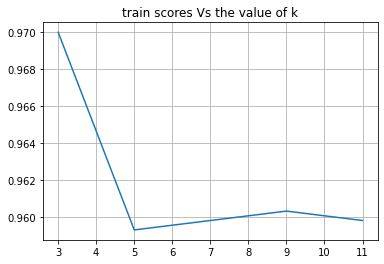

In [41]:
train_scores=[]
k_range=[3,5,7,9,11]

for k in k_range:
    
    model=KNeighborsClassifier(n_neighbors=k) # first itr k = 3
    model.fit(X_train,y_train)
    train_scores.append(model.score(X_train,y_train))
    
print( " train Scores = " ,train_scores)

plt.plot(k_range,train_scores)
plt.grid()
plt.title('train scores Vs the value of k')

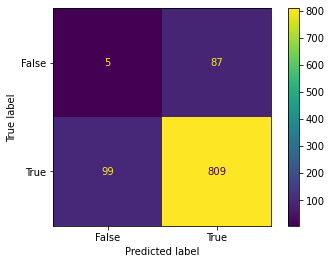

In [57]:
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

NORMAL


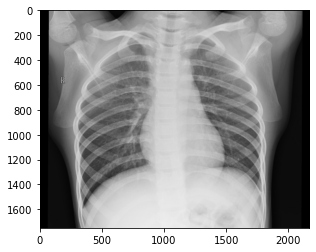

In [23]:
import PIL
normal_lung_image = load_img("D:/AI/S3L2/projects/ML-DM/archive/chest_xray/test/NORMAL/NORMAL2-IM-0013-0001.jpeg")
print("NORMAL")
plt.imshow(normal_lung_image)
plt.show()

PNEUMONIA


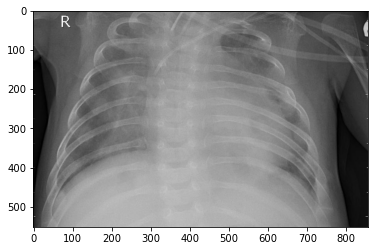

In [22]:
import PIL
normal_lung_image = load_img("D:/AI/S3L2/projects/ML-DM/archive/chest_xray/test/PNEUMONIA\person1_virus_9.jpeg")
print("PNEUMONIA")
plt.imshow(normal_lung_image)
plt.show()

Text(0.5, 1.0, 'Pneumonia')

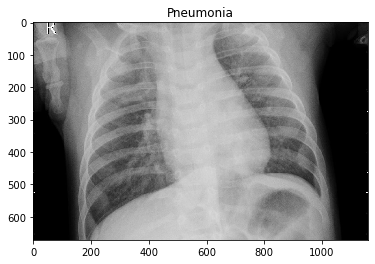

In [136]:
fig = plt.figure()  
folder='D:/AI/S3L2/projects/ML-DM/archive/chest_xray/test/PNEUMONIA/'
imgs=[os.path.join(folder,img) for img in os.listdir(folder) if img.endswith('.jpeg')]
imgs=natsorted(imgs)

img=cv2.imread(imgs[370],cv2.IMREAD_GRAYSCALE)

im = plt.imshow(img,  interpolation='none', aspect='auto',cmap ='gray', vmin=0, vmax=255)   
plt.title('Pneumonia')

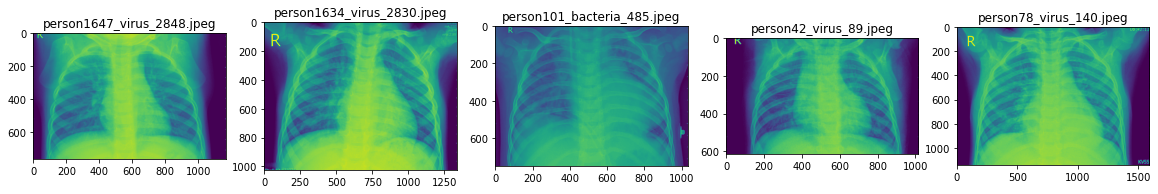

In [127]:
plt.figure(figsize=(20,20))

test_folder="D:/AI/S3L2/projects/ML-DM/archive/chest_xray/test/PNEUMONIA/" 
 
for i in range(5):
    # 
    file = random.choice(os.listdir(test_folder))
    # 
    image_path= os.path.join(test_folder, file)
   
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    
    ax.title.set_text(file)
    
    plt.imshow(img)

In [143]:
Accuracy = metrics.accuracy_score(actual, predicted)

In [144]:
print(Accuracy)

0.814


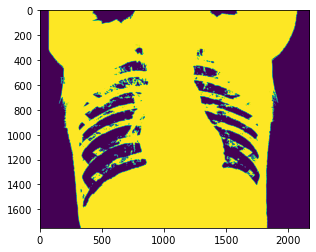

In [1]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("D:/AI/S3L2/projects/ML-DM/archive/chest_xray/test/NORMAL/NORMAL2-IM-0013-0001.jpeg", cv2.IMREAD_GRAYSCALE)

(thresh, img) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(img)
plt.show()